In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline


#warning library imported
import warnings
warnings.filterwarnings('ignore')

#for feature engineering
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#import libraries for ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier




LOAD DATASET


In [77]:
train_data = pd.read_csv("/content/drive/MyDrive/train_dataset_final1.csv")


In [78]:
validate_data = pd.read_csv("/content/drive/MyDrive/validate_dataset_final.csv")

In [79]:
train_data.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [80]:
train_data.tail()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0
25246,30263,1,1,2,160000,58.0,-1,-1,-1,-1,...,1443.08,1442.81,1443.06,1442.97,1443.31,1442.72,1443.00,1443.00,1.00,0


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [82]:
train_data.shape

(25247, 27)

In [83]:
#dropping customer ID for futher analysis(will consider in later stages)
train_data.drop('Customer_ID', axis = 1, inplace = True)

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25247 non-null  int64  
 1   sex                 25247 non-null  int64  
 2   education           25247 non-null  int64  
 3   LIMIT_BAL           25247 non-null  int64  
 4   age                 25121 non-null  float64
 5   pay_0               25247 non-null  int64  
 6   pay_2               25247 non-null  int64  
 7   pay_3               25247 non-null  int64  
 8   pay_4               25247 non-null  int64  
 9   pay_5               25247 non-null  int64  
 10  pay_6               25247 non-null  int64  
 11  Bill_amt1           25247 non-null  float64
 12  Bill_amt2           25247 non-null  float64
 13  Bill_amt3           25247 non-null  float64
 14  Bill_amt4           25247 non-null  float64
 15  Bill_amt5           25247 non-null  float64
 16  Bill

In [85]:
#getting basic information of validate_dataset now
validate_data.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [86]:
validate_data.tail()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
5011,5012,1,0,2,240000,51,0,0,0,0,...,106832.47,109060.11,3591.87,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04
5012,5013,1,1,3,60000,33,0,0,0,0,...,29062.53,28862.41,2100.23,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04
5013,5014,1,0,1,290000,36,1,-2,-1,-1,...,16725.60,17427.88,0.00,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39
5014,5015,1,1,2,120000,28,0,0,0,0,...,75710.06,77502.18,3283.48,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04
5015,5016,2,1,1,100000,24,0,0,0,0,...,14718.27,29426.58,1552.85,4999.62,87.25,14760.83,29513.97,330.11,27439.33,0.31


In [87]:
validate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5016 non-null   int64  
 1   marriage           5016 non-null   int64  
 2   sex                5016 non-null   int64  
 3   education          5016 non-null   int64  
 4   LIMIT_BAL          5016 non-null   int64  
 5   age                5016 non-null   int64  
 6   pay_0              5016 non-null   int64  
 7   pay_2              5016 non-null   int64  
 8   pay_3              5016 non-null   int64  
 9   pay_4              5016 non-null   int64  
 10  pay_5              5016 non-null   int64  
 11  pay_6              5016 non-null   int64  
 12  Bill_amt1          5016 non-null   float64
 13  Bill_amt2          5016 non-null   float64
 14  Bill_amt3          5016 non-null   float64
 15  Bill_amt4          5016 non-null   float64
 16  Bill_amt5          5016 

In [88]:
validate_data.shape

(5016, 26)

duplicate values


In [89]:
train_data.duplicated().value_counts()

,count
False,24444
True,803


In [90]:
#handling null values
null_values = train_data.isnull().sum()
null_values

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0


In [91]:
null_values.fillna(0, inplace = True)

In [92]:
print(null_values)

marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


visualisation of missing values


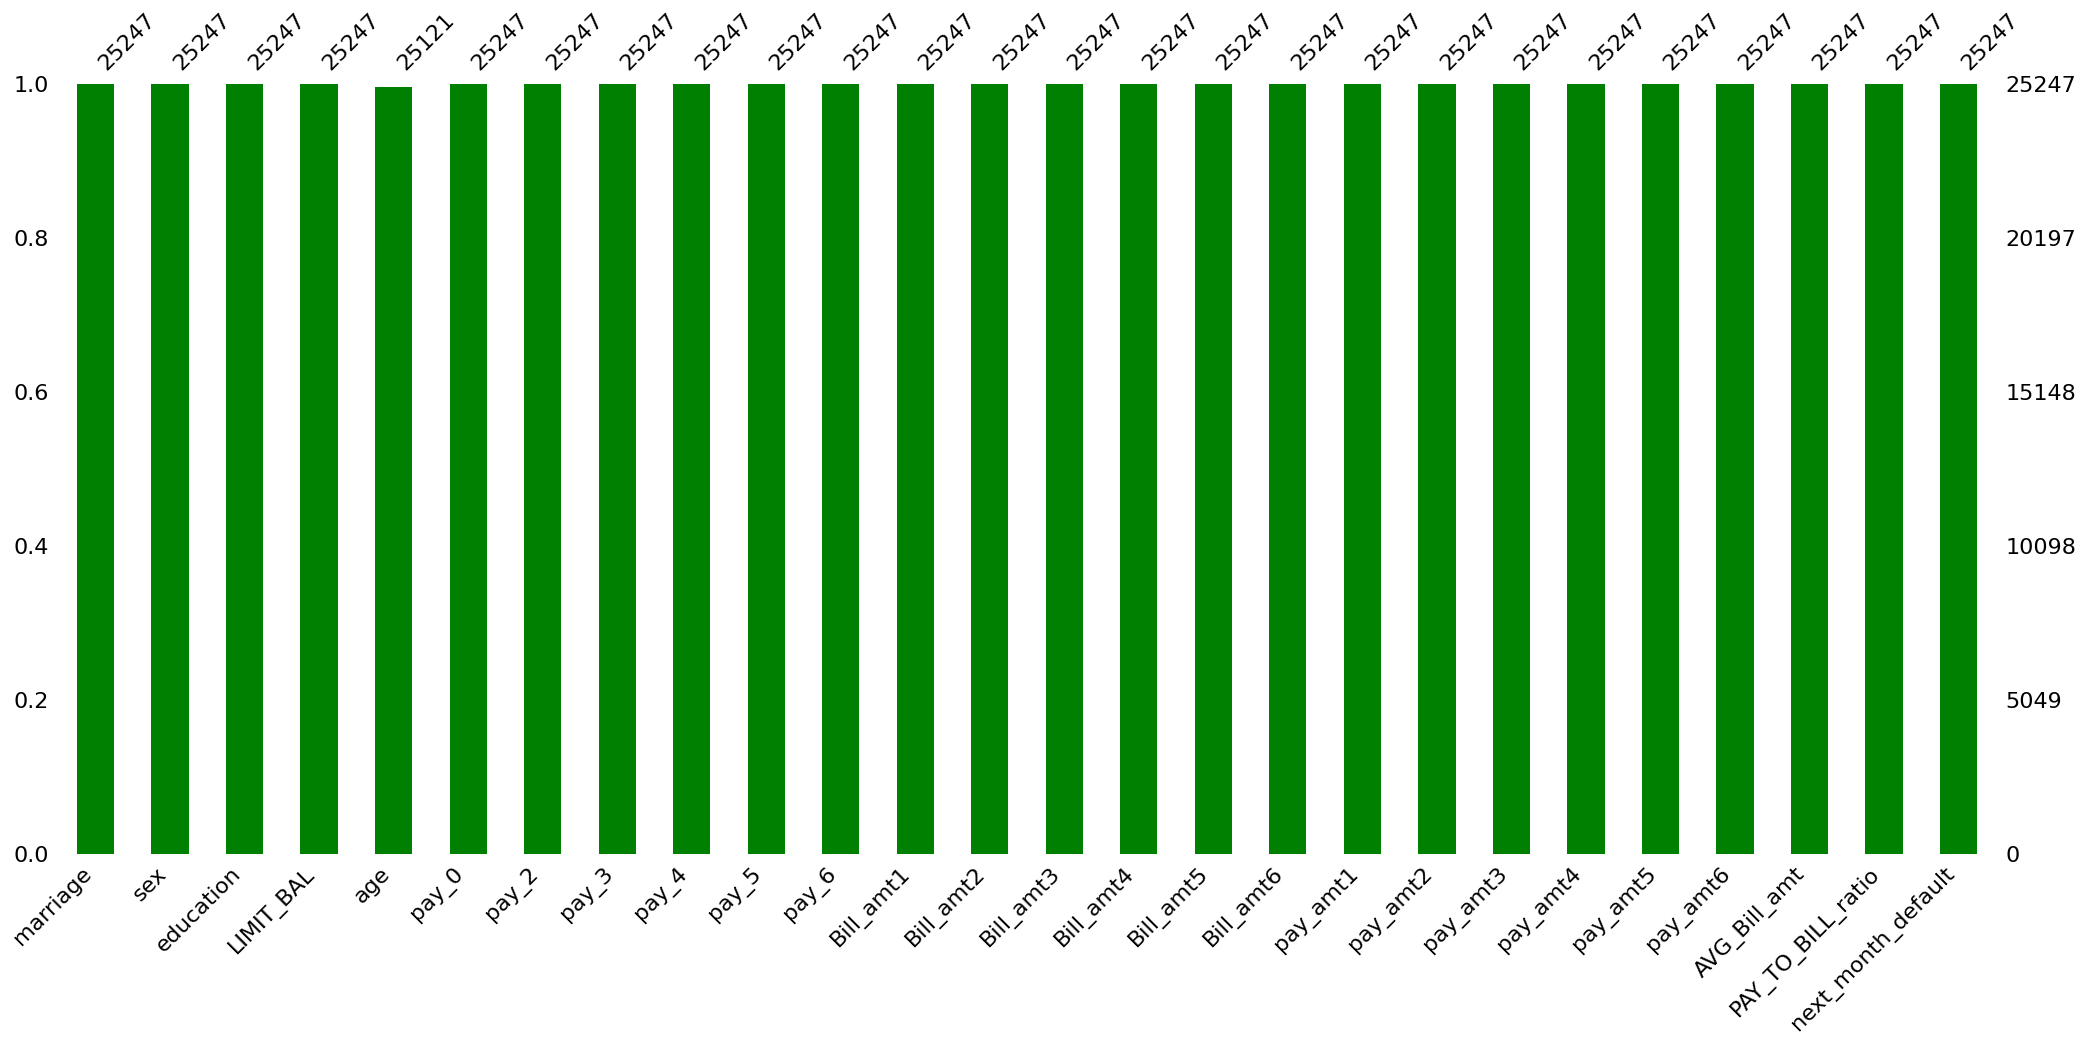

In [93]:
msno.bar(train_data, color = 'green')
plt.show()


Understanding variables

In [94]:
train_data.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [95]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
marriage,25247.0,1.551907,0.522629,0.00,1.000,2.00,2.000,3.00
sex,25247.0,0.604111,0.489050,0.00,0.000,1.00,1.000,1.00
education,25247.0,1.852101,0.797379,0.00,1.000,2.00,2.000,6.00
LIMIT_BAL,25247.0,168342.060443,129892.784807,10000.00,50000.000,140000.00,240000.000,1000000.00
age,25121.0,35.438199,9.174998,21.00,28.000,34.00,41.000,79.00
pay_0,25247.0,-0.042857,1.099315,-2.00,-1.000,0.00,0.000,8.00
pay_2,25247.0,-0.159544,1.173990,-2.00,-1.000,0.00,0.000,8.00
pay_3,25247.0,-0.190359,1.172636,-2.00,-1.000,0.00,0.000,8.00
pay_4,25247.0,-0.241415,1.146753,-2.00,-1.000,0.00,0.000,7.00
pay_5,25247.0,-0.282568,1.114213,-2.00,-1.000,0.00,0.000,7.00


In [96]:
print(train_data.nunique())

marriage                  4
sex                       2
education                 7
LIMIT_BAL                80
age                      56
pay_0                    11
pay_2                    11
pay_3                    11
pay_4                    10
pay_5                     9
pay_6                    10
Bill_amt1             22374
Bill_amt2             21890
Bill_amt3             21591
Bill_amt4             21277
Bill_amt5             21039
Bill_amt6             20577
pay_amt1              15071
pay_amt2              15466
pay_amt3              14332
pay_amt4              13555
pay_amt5              13241
pay_amt6              13289
AVG_Bill_amt          22519
PAY_TO_BILL_ratio       564
next_month_default        2
dtype: int64


copying of this data for replacing the numerical values of marriage etc into a categorical value for simplicity(though not required)


In [97]:
copi = train_data.copy()

In [98]:
copi.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [99]:
copi = train_data.copy()

#renaming dependent variable
copi.rename(columns={'next_month_default' : 'IsDefaulter'}, inplace=True)
#simplicity
copi.rename(columns={'pay_0':'repay_sept', 'pay_2':'repay_aug','pay_3':'repay_july','pay_4':'repay_june','pay_5':'repay_may','pay_6':'repay_april'}, inplace = True)
copi.rename(columns={'Bill_amt1':'bill_sept', 'Bill_amt2':'bill_aug','Bill_amt3':'bill_july','Bill_amt4':'bill_june','Bill_amt5':'bill_may','Bill_amt6':'bill_apr'}, inplace = True)
copi.rename(columns={'pay_amt1':'pay_sept', 'pay_amt2':'pay_aug','pay_amt3':'pay_july','pay_amt4':'pay_june','pay_amt5':'pay_may','pay_amt6':'pay_apr'}, inplace = True)




In [100]:
copie = copi.copy()

copie.replace({
    'sex': {1: 'male', 0: 'female'},
    'education': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others', 5: 'others', 6: 'others', 0: 'others'},
    'marriage': {1: 'married', 2: 'single', 3: 'others', 0: 'others'},
    'IsDefaulter': {1: 'yes', 0: 'no'}
}, inplace=True)


EDA analysis starts from here

In [101]:
copie.head()

,marriage,sex,education,LIMIT_BAL,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_apr,pay_sept,pay_aug,pay_july,pay_june,pay_may,pay_apr,AVG_Bill_amt,PAY_TO_BILL_ratio,IsDefaulter
0,single,female,university,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,no
1,single,male,graduate school,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,no
2,married,female,university,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,no
3,married,male,university,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,no
4,single,female,graduate school,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,no


data visualisation and experimentation


dependent variable analysis(percentage of defauters and non-defaulters) in the training dataset

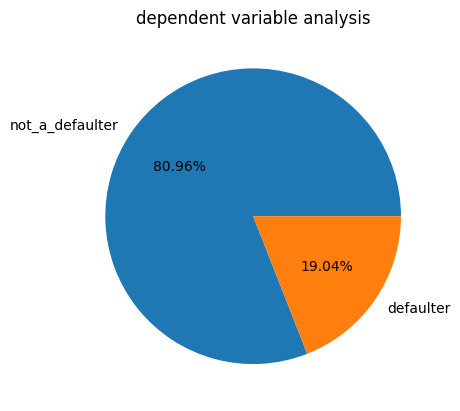

In [102]:
plt.pie(x = copie['IsDefaulter'].value_counts(), labels = ['not_a_defaulter','defaulter'] , autopct = '%.2f%%')
plt.title('dependent variable analysis')
plt.show()

Univariate and bivariate visualisation in gender column vs defaulters

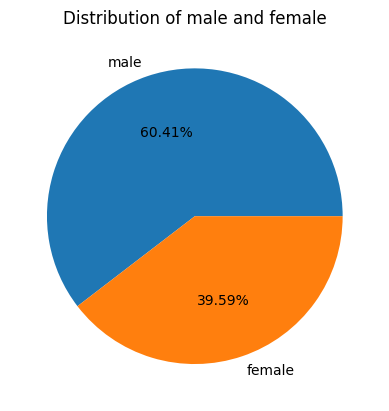

In [103]:
#univariate analysis
plt.pie(x = copie['sex'].value_counts(), labels = ['male','female'] , autopct = '%.2f%%')
plt.title('Distribution of male and female')
plt.show()

Text(0.5, 1.0, 'sex vs defaulters')

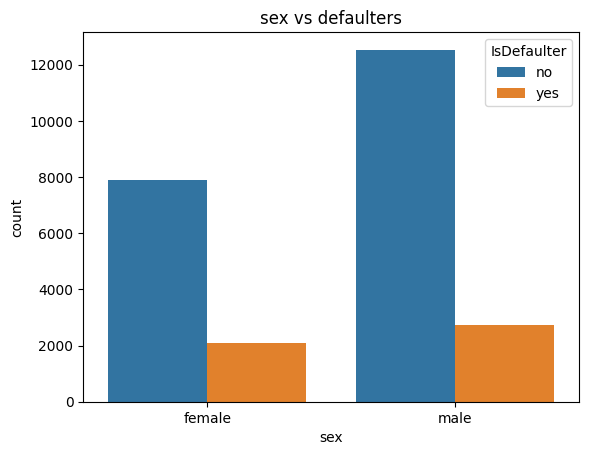

In [104]:
#bivariate analysis of sex vs defaulters
plot_one = sns.countplot(x= copie['sex'], hue = copie['IsDefaulter'], data = copie)
plot_one.set_title('sex vs defaulters')


In [105]:
#data of defaulters vs their sex
TEST = copie.groupby(by=['sex','IsDefaulter'])
count_values = TEST['IsDefaulter'].count()
count_values


sex     IsDefaulter
female  no              7910
        yes             2085
male    no             12530
        yes             2722
Name: IsDefaulter, dtype: int64

Distribution of people by their sex and education and then the plot between defaulters and their education

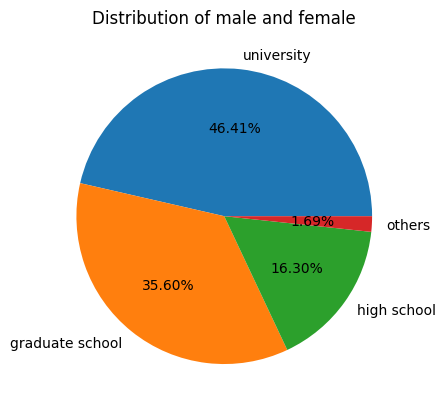

In [106]:

# Chart - 3 visualization code
plt.pie(x = copie['education'].value_counts(), labels = ['university','graduate school','high school', 'others'] , autopct = '%.2f%%')
plt.title('Distribution of male and female')
plt.show()




Text(0.5, 1.0, 'EDUCATION VS DEFAULTERS')

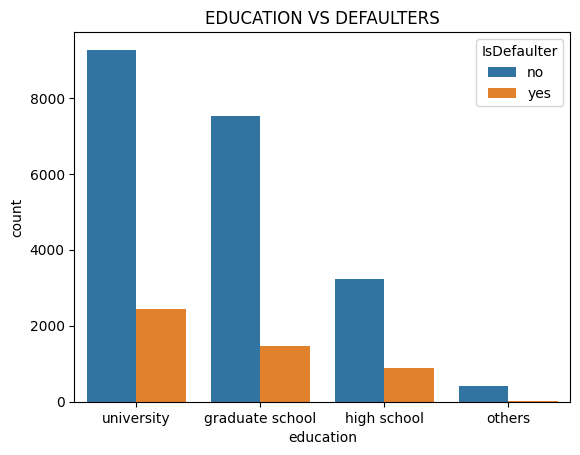

In [107]:
# Bivariate analysis of Education vs Defaulters
plot2 = sns.countplot(x='education', hue='IsDefaulter', data=copie)
plot2.set_title('EDUCATION VS DEFAULTERS')



In [108]:
#list of defaulters vs their education
TEST = copie.groupby(by=['education','IsDefaulter'])
count_values = TEST['IsDefaulter'].count()
count_values


education        IsDefaulter
graduate school  no             7534
                 yes            1454
high school      no             3238
                 yes             877
others           no              401
                 yes              26
university       no             9267
                 yes            2450
Name: IsDefaulter, dtype: int64

Distribution of marriage vs defaulters and male/female vs their married status


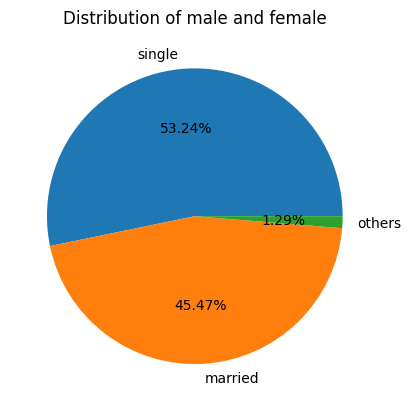

In [109]:
plt.pie(x = copie['marriage'].value_counts(), labels = ['single','married','others'] , autopct = '%.2f%%')
plt.title('Distribution of male and female')
plt.show()


Text(0.5, 1.0, 'MARRIAGE vs Defaulters')

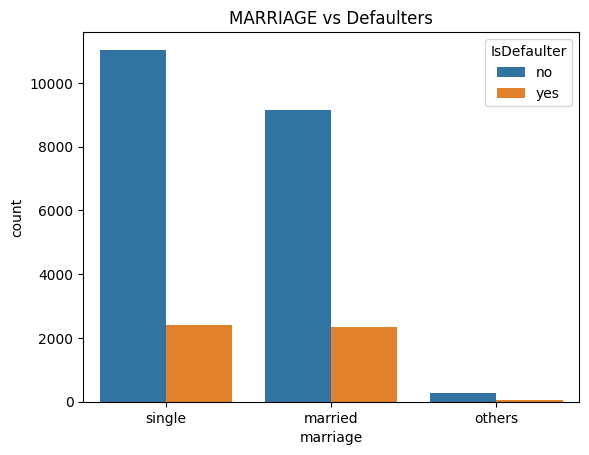

In [110]:
# bivariate analysis of Marriage vs Isdefaulters
plot3 = sns.countplot(x='marriage', hue=copie['IsDefaulter'], data=copie)
plot3.set_title('MARRIAGE vs Defaulters')



In [111]:
#numbers between married status and defaulters
Distribution_stats = copie.groupby(by=['marriage','IsDefaulter'])
Count = Distribution_stats['IsDefaulter'].value_counts()
Count


marriage  IsDefaulter
married   no              9141
          yes             2339
others    no               262
          yes               64
single    no             11037
          yes             2404
Name: count, dtype: int64

Distribution of credit card holders and their age and the defaulters of different age groups(between different genders)

Text(0.5, 1.0, 'Distribution of Age of Credit Card Holder')

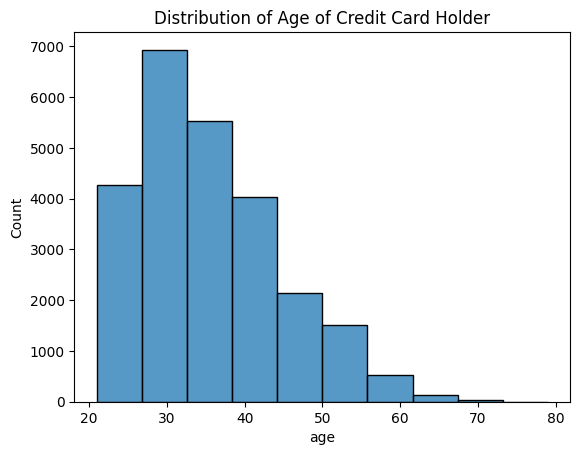

In [112]:
# univariate analysis: distribution of Marriage
age_dist = sns.histplot(x=copie['age'],bins=10, data = copie)
age_dist.set_title('Distribution of Age of Credit Card Holder')


Age of Male v/s Defaulters

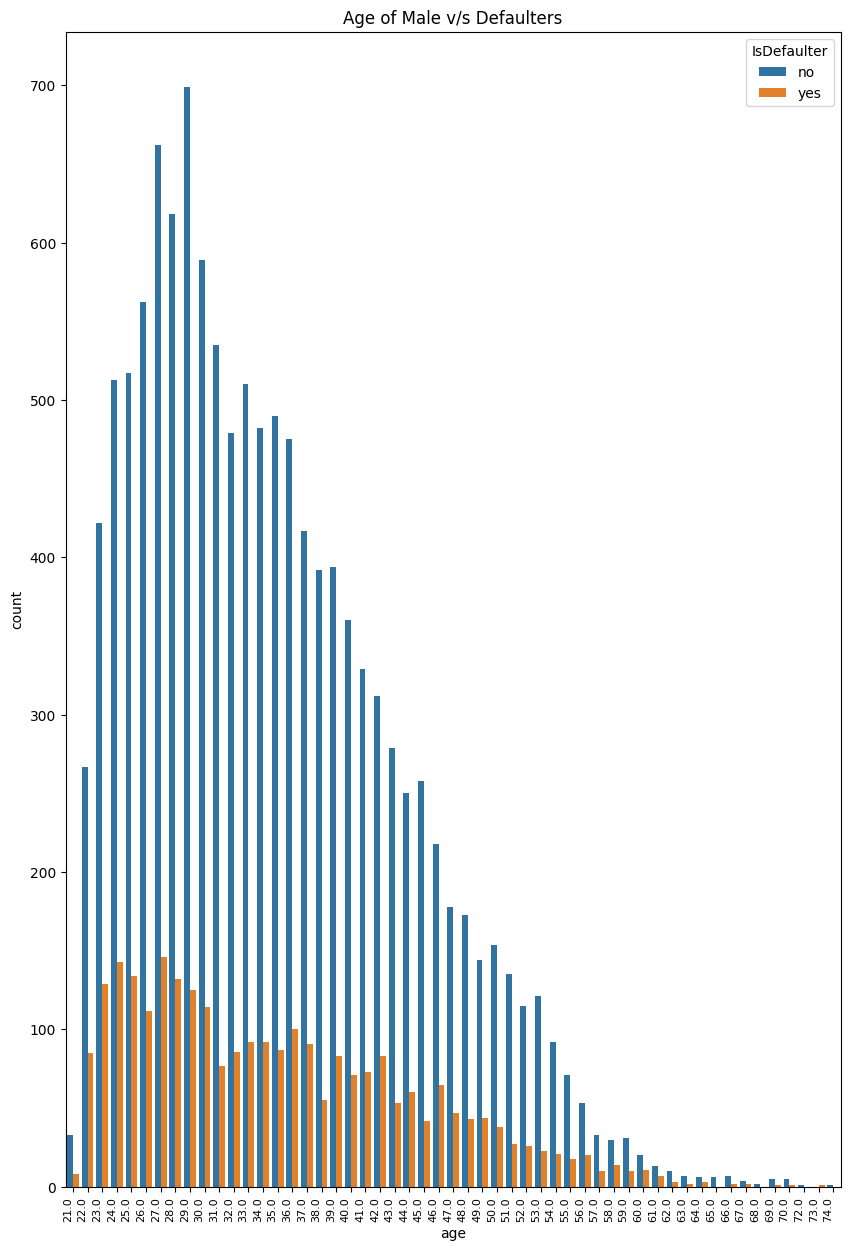

In [113]:
#create two dataframe of male and female
Age_male = copie[copie['sex'] == 'male']
Age_female = copie[copie['sex'] == 'female']
plt.figure(figsize = (10,15))
plot4 = sns.countplot(x='age', hue='IsDefaulter', data=Age_male)
plot4.set_title('Age of Male v/s Defaulters')
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

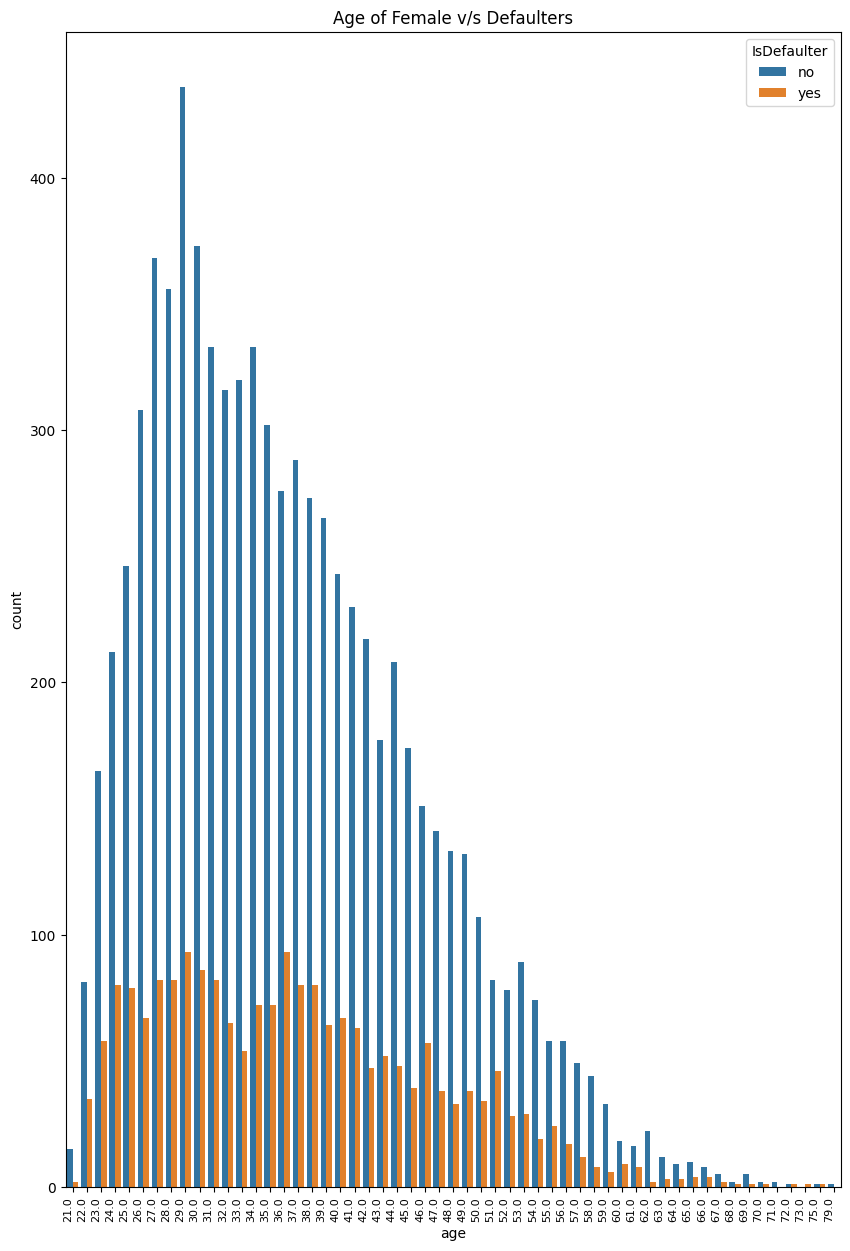

In [114]:
#plot age of female card holder vs Defaulter
plt.figure(figsize=(10,15))
plot5 = sns.countplot(x='age', hue='IsDefaulter', data=Age_female)
plot5.set_title('Age of Female v/s Defaulters')
plot5.set_xticklabels(plot5.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

Distribution of Balance Limit of Credit Card Holder

Text(0.5, 1.0, 'Distribution of Balance Limit of Credit Card Holder')

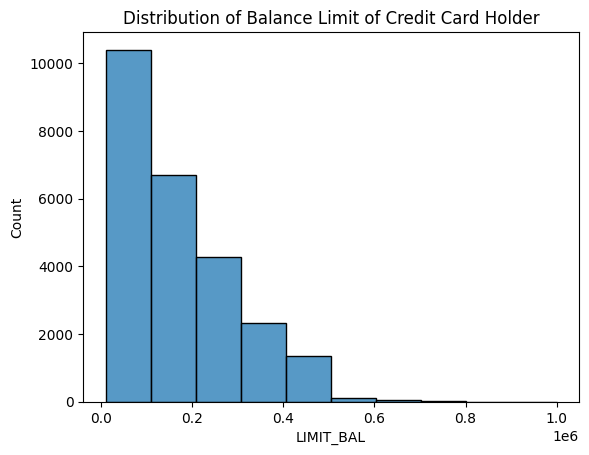

In [115]:
# Chart - 6 visualization code

# univariate analysis-distribution of Marriage
age_distns = sns.histplot(x=copie['LIMIT_BAL'],bins=10, data = copie)
age_distns.set_title('Distribution of Balance Limit of Credit Card Holder')




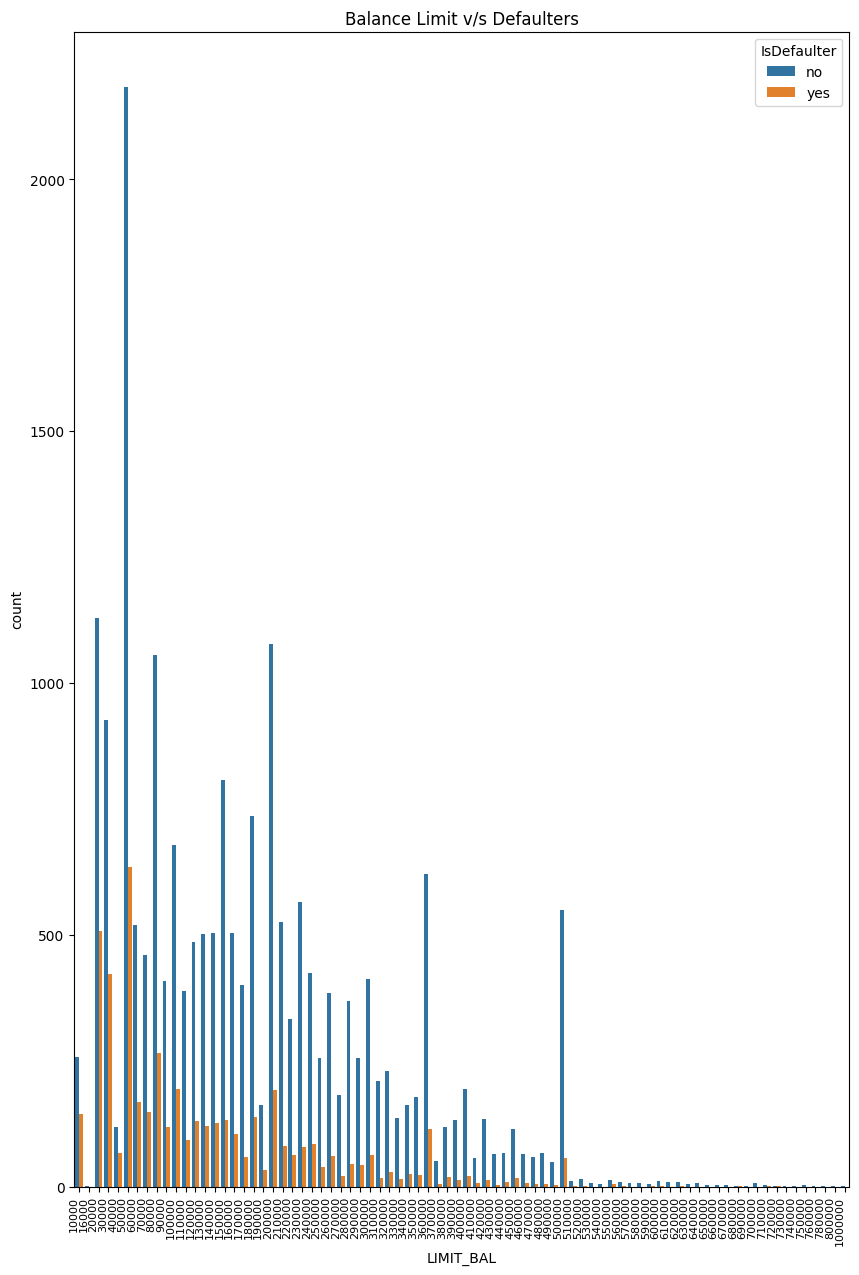

In [116]:
# plot of age of male card holder vs Defaulter
plt.figure(figsize=(10,15))
plot6 = sns.countplot(x='LIMIT_BAL',hue='IsDefaulter',data=copie)
plot6.set_title('Balance Limit v/s Defaulters')
plot6.set_xticklabels(plot6.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

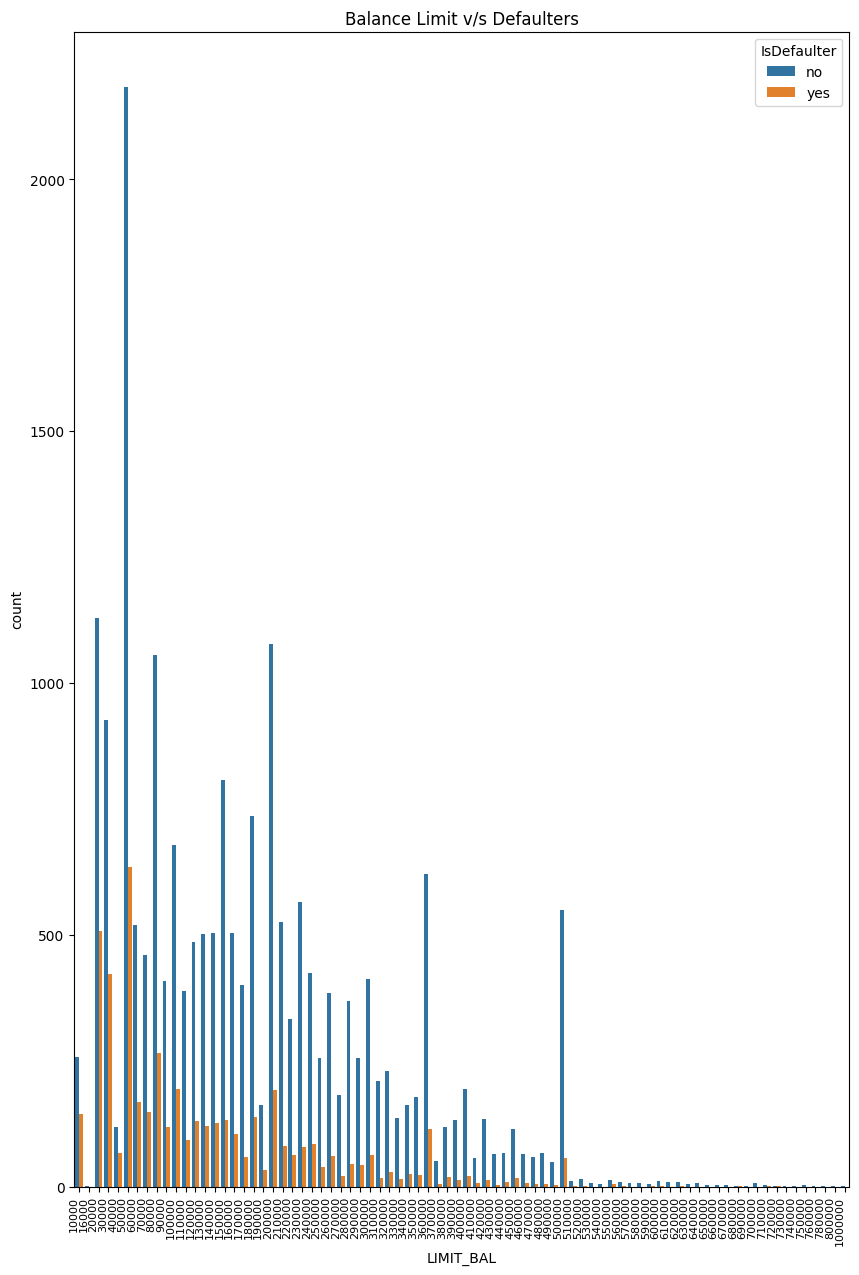

In [117]:
# plot of age of female card holder vs Defaulter
plt.figure(figsize=(10,15))
plot7 = sns.countplot(x='LIMIT_BAL',hue='IsDefaulter',data=copie)
plot7.set_title('Balance Limit v/s Defaulters')
plot7.set_xticklabels(plot7.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

plot between repay_sept vs defaulters(and of different months as well)

Text(0.5, 1.0, 'repay_sept vs defaulters')

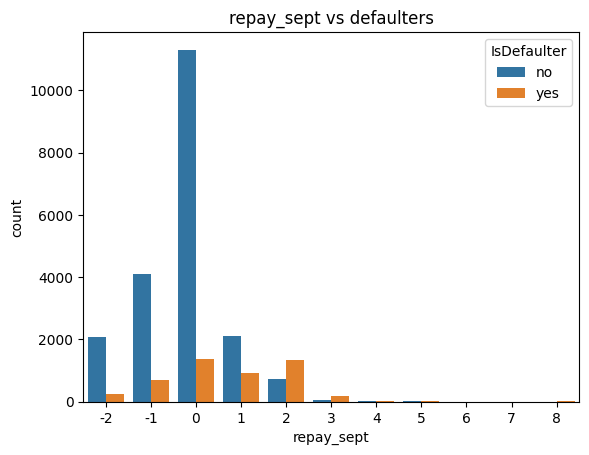

In [118]:
plot8 = sns.countplot(x='repay_sept', hue='IsDefaulter', data=copie)
plot8.set_title('repay_sept vs defaulters')


Text(0.5, 1.0, 'repay_aug vs defaulters')

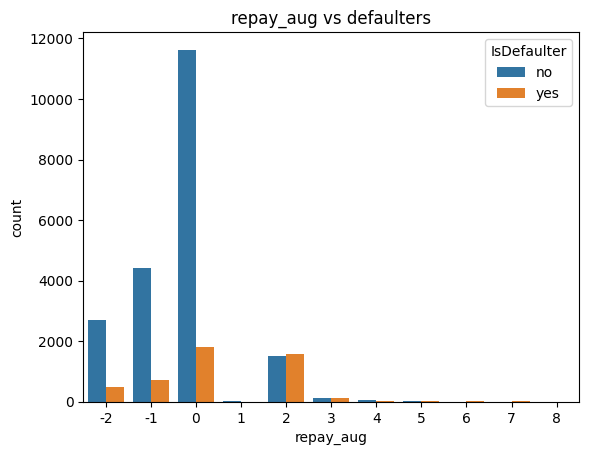

In [119]:
plot9 = sns.countplot(x='repay_aug', hue='IsDefaulter', data=copie)
plot9.set_title('repay_aug vs defaulters')


Text(0.5, 1.0, 'repay_july vs defaulters')

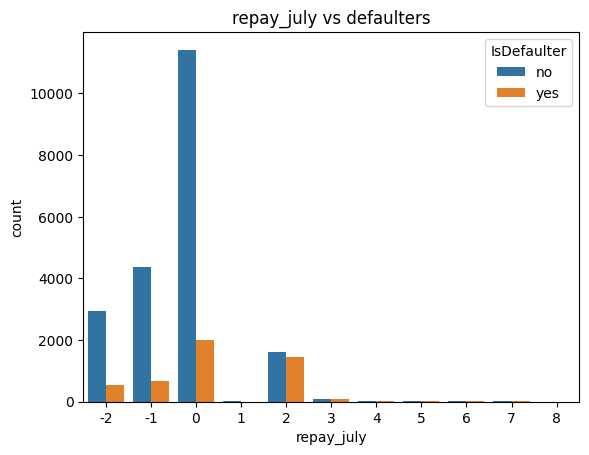

In [120]:
plot10 = sns.countplot(x='repay_july', hue='IsDefaulter', data=copie)
plot10.set_title('repay_july vs defaulters')


Text(0.5, 1.0, 'repay_june vs defaulters')

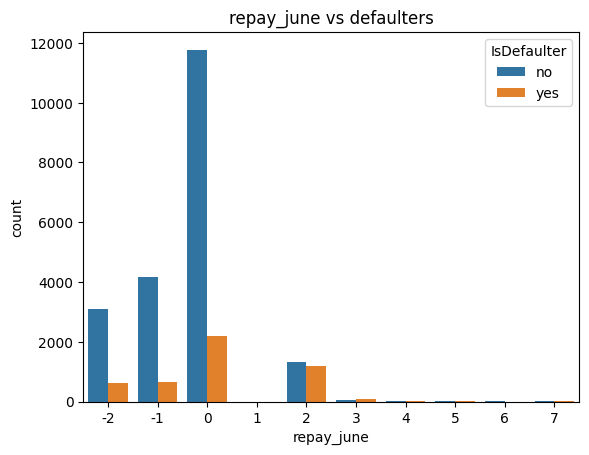

In [121]:
plot11= sns.countplot(x='repay_june', hue='IsDefaulter', data=copie)
plot11.set_title('repay_june vs defaulters')


Text(0.5, 1.0, 'repay_may vs defaulters')

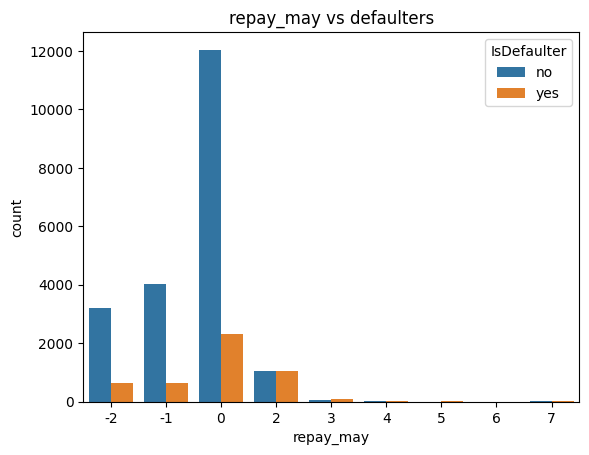

In [122]:
plot12 = sns.countplot(x='repay_may', hue='IsDefaulter', data=copie)
plot12.set_title('repay_may vs defaulters')


Text(0.5, 1.0, 'repay_april vs defaulters')

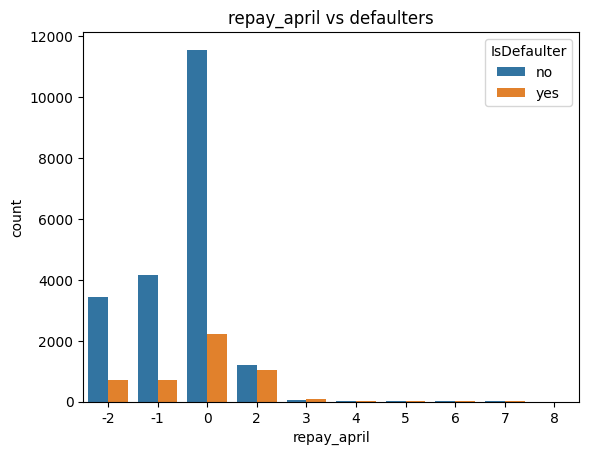

In [123]:
plot13 = sns.countplot(x='repay_april', hue='IsDefaulter', data=copie)
plot13.set_title('repay_april vs defaulters')


In [124]:
Repay_col = ['repay_sept', 'repay_aug', 'repay_july', 'repay_june', 'repay_may', 'repay_april']
for i in range(0, len(Repay_col)):
    TEST = copie.groupby(by=[Repay_col[i], 'IsDefaulter'])
    count_values = TEST['IsDefaulter'].count()
    print(count_values)


repay_sept  IsDefaulter
-2          no              2073
            yes              258
-1          no              4115
            yes              706
 0          no             11304
            yes             1363
 1          no              2123
            yes              907
 2          no               715
            yes             1332
 3          no                68
            yes              176
 4          no                19
            yes               37
 5          no                10
            yes               11
 6          no                 5
            yes                3
 7          no                 2
            yes                6
 8          no                 6
            yes                8
Name: IsDefaulter, dtype: int64
repay_aug  IsDefaulter
-2         no              2709
           yes              501
-1         no              4408
           yes              720
 0         no             11629
           yes             1795
 1 

plots between bill_months vs defaulters

Text(0.5, 1.0, 'bill_sept vs defaulters')

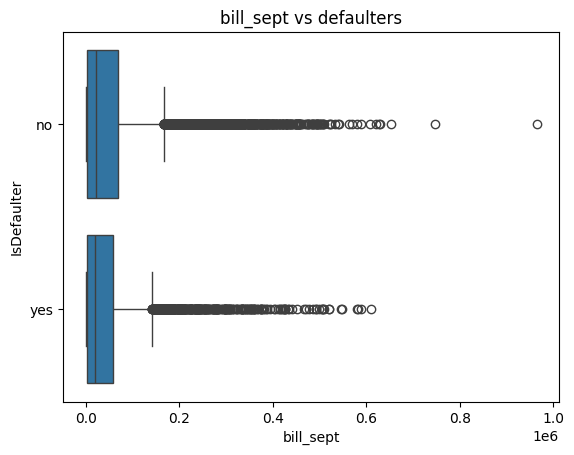

In [125]:
plot14 = sns.boxplot(x='bill_sept', y = 'IsDefaulter', data=copie)
plot14.set_title('bill_sept vs defaulters')


Text(0.5, 1.0, 'bill_aug vs defaulters')

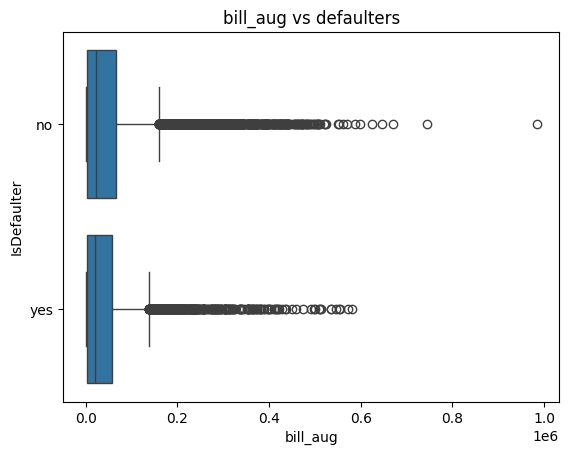

In [126]:
plot15 = sns.boxplot(x='bill_aug', y = 'IsDefaulter', data=copie)
plot15.set_title('bill_aug vs defaulters')


Text(0.5, 1.0, 'bill_july vs defaulters')

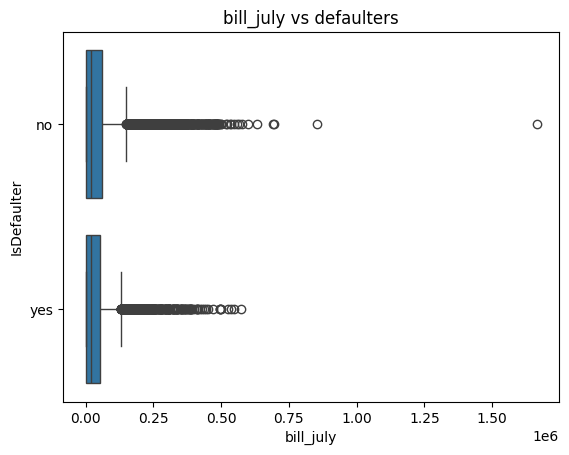

In [127]:
plot16 = sns.boxplot(x='bill_july', y = 'IsDefaulter', data=copie)
plot16.set_title('bill_july vs defaulters')


Text(0.5, 1.0, 'bill_june vs defaulters')

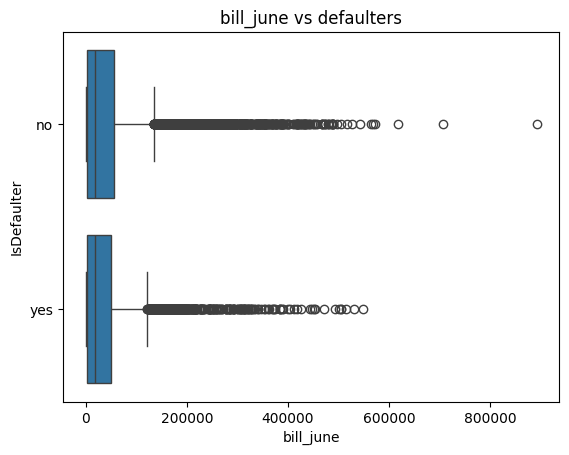

In [128]:
plot17 = sns.boxplot(x='bill_june', y = 'IsDefaulter', data=copie)
plot17.set_title('bill_june vs defaulters')


Text(0.5, 1.0, 'bill_may vs defaulters')

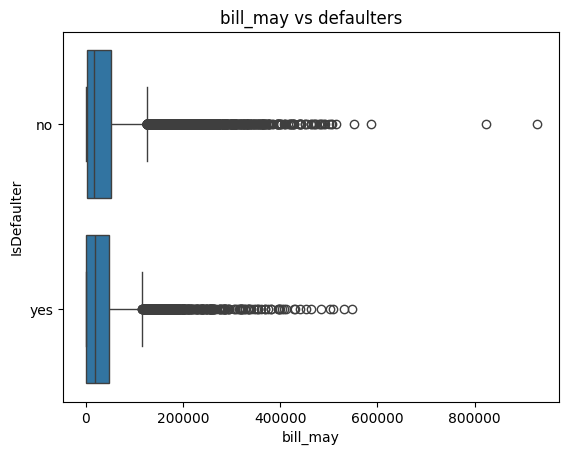

In [129]:
plot18 = sns.boxplot(x='bill_may', y = 'IsDefaulter', data=copie)
plot18.set_title('bill_may vs defaulters')


Text(0.5, 1.0, 'bill_april vs defaulters')

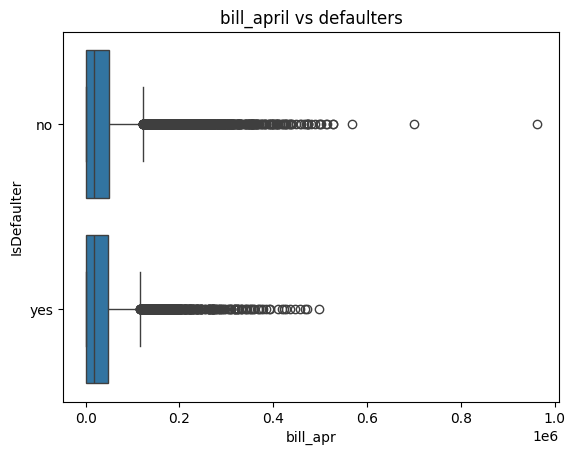

In [130]:
plot19 = sns.boxplot(x='bill_apr', y = 'IsDefaulter', data=copie)
plot19.set_title('bill_april vs defaulters')


scatterplot b/w pay_month and bill_month

Text(0.5, 1.0, 'scatterplot b/w pay_sept and bill_sept')

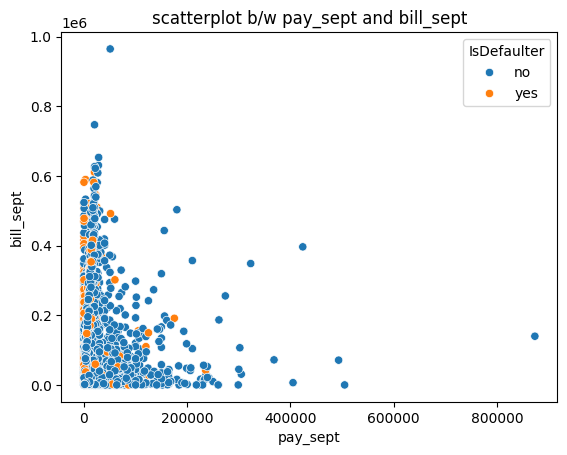

In [131]:
plot20 = sns.scatterplot(x='pay_sept', y ='bill_sept',hue = 'IsDefaulter',data=copie)
plot20.set_title('scatterplot b/w pay_sept and bill_sept')


Text(0.5, 1.0, 'scatterplot b/w pay_aug and bill_aug')

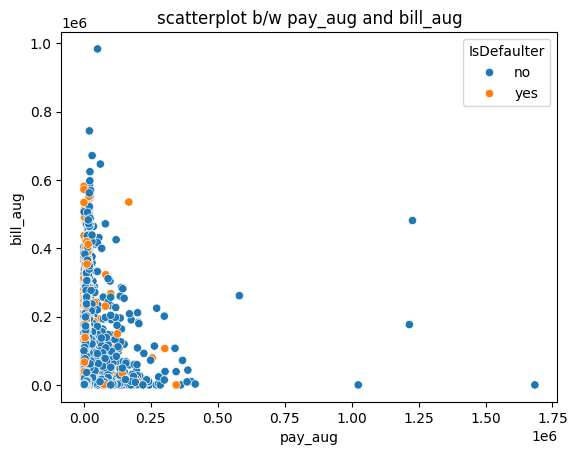

In [132]:
plot21 = sns.scatterplot(x='pay_aug', y ='bill_aug',hue = 'IsDefaulter',data=copie)
plot21.set_title('scatterplot b/w pay_aug and bill_aug')


Text(0.5, 1.0, 'scatterplot b/w pay_sept and bill_sept')

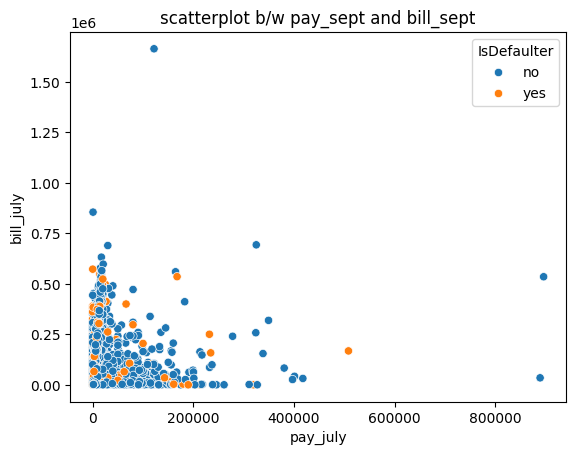

In [133]:
plot22 = sns.scatterplot(x='pay_july', y ='bill_july',hue = 'IsDefaulter',data=copie)
plot22.set_title('scatterplot b/w pay_sept and bill_sept')


Text(0.5, 1.0, 'scatterplot b/w pay_june and bill_june')

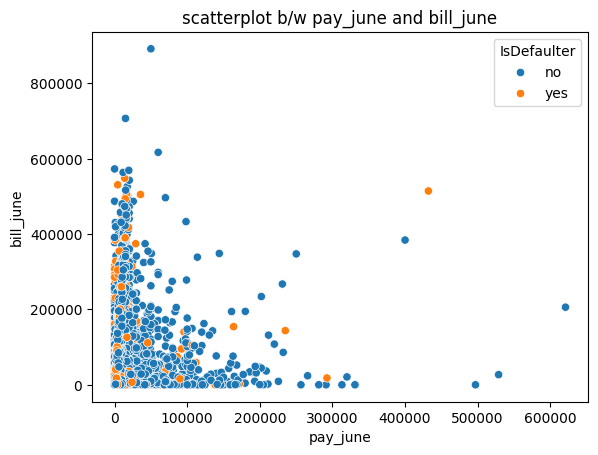

In [134]:
plot23 = sns.scatterplot(x='pay_june', y ='bill_june',hue = 'IsDefaulter',data=copie)
plot23.set_title('scatterplot b/w pay_june and bill_june')


Text(0.5, 1.0, 'scatterplot b/w pay_may and bill_may')

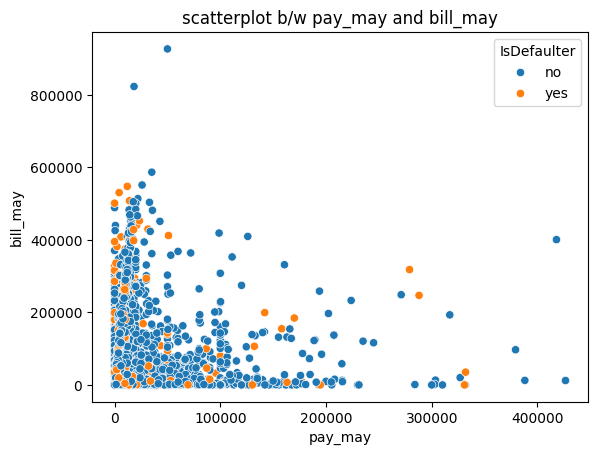

In [135]:
plot24 = sns.scatterplot(x='pay_may', y ='bill_may',hue = 'IsDefaulter',data=copie)
plot24.set_title('scatterplot b/w pay_may and bill_may')


Text(0.5, 1.0, 'scatterplot b/w pay_apr and bill_apr')

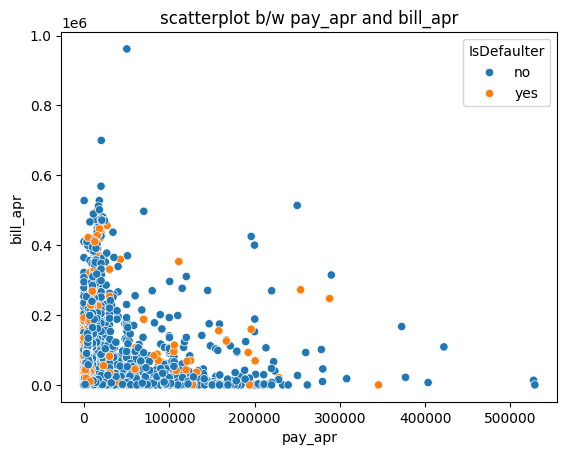

In [136]:
plot25 = sns.scatterplot(x='pay_apr', y ='bill_apr',hue = 'IsDefaulter',data=copie)
plot25.set_title('scatterplot b/w pay_apr and bill_apr')


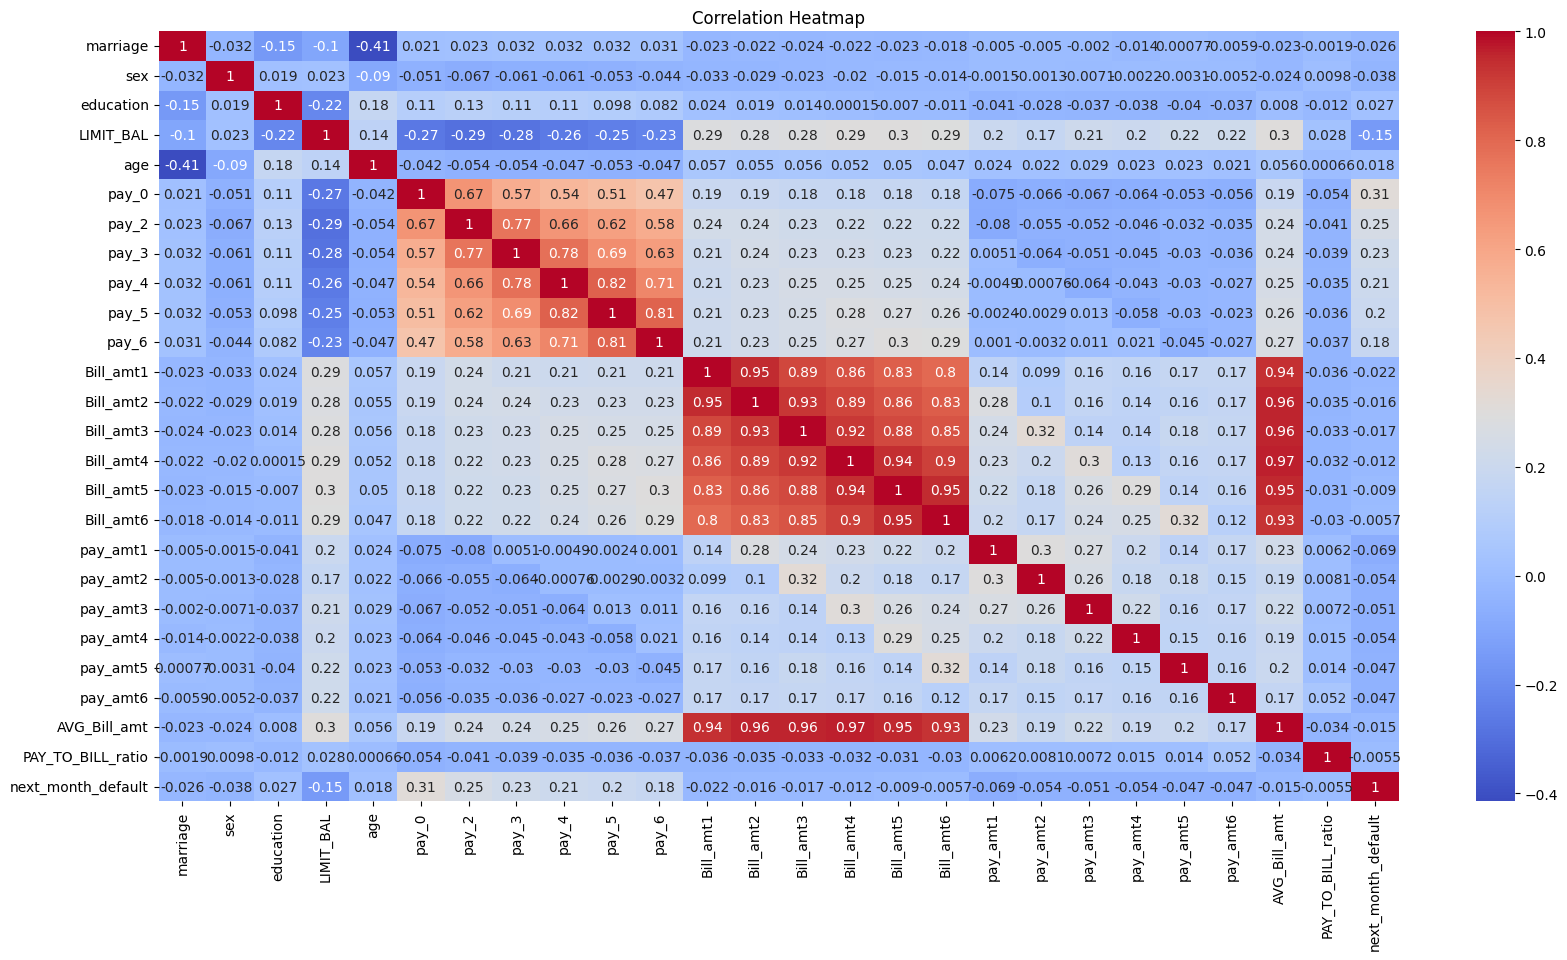

In [137]:
# Chart - 10 visualization code
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
# Select only the numeric columns for correlation calculation
correl = train_data.corr()
sns.heatmap(correl, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**FEATURE ENGINEERING AND PREPROCESSING**

In [138]:
#define credit utilisation ratio
#consider copying data one more time
df = train_data.copy()

bill_columns = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
df['total_bill'] = df[bill_columns].mean(axis=1)
df['credit_util_ratio'] = df['total_bill'] / (df['LIMIT_BAL'])

print(df['credit_util_ratio'])


0        0.691858
1        0.008742
2        0.280120
3        0.410618
4        0.042194
           ...   
25242    0.914589
25243    0.689526
25244    0.025597
25245    0.505842
25246    0.009020
Name: credit_util_ratio, Length: 25247, dtype: float64


In [139]:
# defining deliquency streak
def calculate_delinquency_streak(row):
    streak = 0
    max_streak = 0
    for pay in row[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]:
        if pay >= 1:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak
df['delinquency_streak'] = df.apply(calculate_delinquency_streak, axis=1)


In [140]:
print(df['delinquency_streak'])

0        3
1        0
2        0
3        0
4        0
        ..
25242    2
25243    0
25244    0
25245    0
25246    0
Name: delinquency_streak, Length: 25247, dtype: int64


In [141]:
# defining repayment consistency
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
df["Payment_Variance"] = df[pay_amt_cols].var(axis=1)
df["Total_Payment"] = df[pay_amt_cols].sum(axis=1)
df["Total_Bill"] = df[bill_columns].sum(axis=1)
df["Payment_to_Bill_Ratio"] = df["Total_Payment"] / (df["Total_Bill"] + 1e-6)  # Avoid division by zero

print(df["Payment_to_Bill_Ratio"])



0        0.031947
1        0.266263
2        0.039850
3        0.035660
4        0.723902
           ...   
25242    0.054621
25243    0.144262
25244    1.313907
25245    0.031295
25246    0.999878
Name: Payment_to_Bill_Ratio, Length: 25247, dtype: float64


In [142]:
#count of overdue months
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df["Overdue_Count"] = (df[pay_status_cols] >= 1).sum(axis=1)

print(df['Overdue_Count'])



0        3
1        0
2        0
3        0
4        0
        ..
25242    2
25243    0
25244    0
25245    0
25246    0
Name: Overdue_Count, Length: 25247, dtype: int64


In [143]:
# all the features included
print(df)

       marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  pay_3  pay_4  \
0             2    0          2      60000  25.0      2      2      2      0   
1             2    1          1     290000  24.0      0      0     -2     -2   
2             1    0          2     180000  63.0      0      0      0      0   
3             1    1          2     210000  43.0      0      0      0      0   
4             2    0          1     280000  32.0     -2     -2     -2     -2   
...         ...  ...        ...        ...   ...    ...    ...    ...    ...   
25242         1    1          2      90000  33.0      0      0      0      0   
25243         1    0          2      60000  49.0      0      0      0      0   
25244         2    0          1     120000  31.0     -1     -1     -1     -1   
25245         1    1          4     390000  40.0      0      0      0      0   
25246         1    1          2     160000  58.0     -1     -1     -1     -1   

       pay_5  ...  PAY_TO_BILL_ratio  n

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'next_month_default' is your target variable
# and the rest are features.
# Adjust the columns as per your actual features and target
features = df.drop('next_month_default', axis=1)
target = df['next_month_default']

# Impute missing values in the 'age' column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features['age'] = imputer.fit_transform(features[['age']])


# Split the data into training and validation sets
X, X_val, y, y_val = train_test_split(features, target, test_size=0.2, random_state=42)


# 6. scaling data (for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(X_val)

In [145]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you want to resample the scaled training data (X_scaled, y)
# Step 2: Resample the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 3: Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

In [146]:
# 7. CLASS IMBALANCE HANDLING
print("Original class distribution:", y.value_counts())
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)
print("After SMOTE:", pd.Series(y_res).value_counts())


Original class distribution: next_month_default
0    16345
1     3852
Name: count, dtype: int64
After SMOTE: next_month_default
1    16345
0    16345
Name: count, dtype: int64


In [147]:
#Class Weighting Technique
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

ML MODEL IMPLEMENTATION

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

r_model = RandomForestClassifier(random_state=42)
r_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3256
           1       0.90      0.86      0.88      3282

    accuracy                           0.88      6538
   macro avg       0.88      0.88      0.88      6538
weighted avg       0.88      0.88      0.88      6538



In [150]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      3256
           1       0.76      0.57      0.65      3282

    accuracy                           0.70      6538
   macro avg       0.71      0.70      0.69      6538
weighted avg       0.71      0.70      0.69      6538



In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Initialize the model
Detree_model = DecisionTreeClassifier(random_state=42)

# 2. Train on the training data
Detree_model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = Detree_model.predict(X_test)

# 4. Evaluate
print("Decision Tree Classification")
print(classification_report(y_test, y_pred))


Decision Tree Classification
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3256
           1       0.80      0.81      0.80      3282

    accuracy                           0.80      6538
   macro avg       0.80      0.80      0.80      6538
weighted avg       0.80      0.80      0.80      6538



In [152]:
from xgboost import XGBClassifier

xg_b = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_b.fit(X_train, y_train)
y_xgb = xg_b.predict(X_test)

print("xGBoost:")
print(classification_report(y_test, y_xgb))

xGBoost:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3256
           1       0.92      0.84      0.87      3282

    accuracy                           0.88      6538
   macro avg       0.88      0.88      0.88      6538
weighted avg       0.88      0.88      0.88      6538



In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      3256
           1       0.75      0.92      0.82      3282

    accuracy                           0.80      6538
   macro avg       0.82      0.80      0.80      6538
weighted avg       0.82      0.80      0.80      6538



In [154]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report


lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)


print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 13063, number of negative: 13089
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8298
[LightGBM] [Info] Number of data points in the train set: 26152, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499503 -> initscore=-0.001988
[LightGBM] [Info] Start training from score -0.001988
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3256
           1       0.93      0.83      0.88      3282

    accuracy                           0.88      6538
   macro avg       0.89      0.88      0.88      6538
weighted avg       0.89      0.88      0.88      6538



In [155]:
#calculation of F2 score and accuracy of each model
from sklearn.metrics import fbeta_score, accuracy_score , roc_auc_score

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    # Calculate predicted probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    f2 = fbeta_score(y_test, y_pred, beta=2)
    acc = accuracy_score(y_test, y_pred)
    # Use y_proba for roc_auc_score
    auc = roc_auc_score(y_test, y_proba)
    print(f"The F2 Score is {f2:.4f}, Accuracy is {acc:.4f} and AUC-ROC score is {auc:.4f} for {name}")

In [156]:
evaluate_model(r_model, "RandomForestClassifier")
evaluate_model(lr, "LogisticRegression")
evaluate_model(Detree_model, "DecisionTreeClassifier")
evaluate_model(xg_b, "xGBoostClassifier")
evaluate_model(knn_model, "KNeighborsClassifier")
evaluate_model(lgb_model, "LightGBM")


The F2 Score is 0.8658, Accuracy is 0.8784 and AUC-ROC score is 0.9453 for RandomForestClassifier
The F2 Score is 0.6026, Accuracy is 0.6961 and AUC-ROC score is 0.7630 for LogisticRegression
The F2 Score is 0.8073, Accuracy is 0.8012 and AUC-ROC score is 0.8011 for DecisionTreeClassifier
The F2 Score is 0.8515, Accuracy is 0.8792 and AUC-ROC score is 0.9394 for xGBoostClassifier
The F2 Score is 0.8792, Accuracy is 0.8024 and AUC-ROC score is 0.8874 for KNeighborsClassifier
The F2 Score is 0.8497, Accuracy is 0.8827 and AUC-ROC score is 0.9404 for LightGBM


In [157]:
def select_best_model_threshold(models, thresholds=np.arange(0.1, 0.91, 0.05)):
    results = []

    from sklearn.metrics import f1_score, fbeta_score, accuracy_score, precision_score, recall_score, roc_auc_score

    for name, model in models.items():
        if not hasattr(model, "predict_proba"):
            print(f" {name} does not support predict_proba. Skipping.")
            continue

        y_proba = model.predict_proba(X_test)[:, 1]

        for thresh in thresholds:
            y_pred = (y_proba >= thresh).astype(int)

            f1 = f1_score(y_test, y_pred)
            f2 = fbeta_score(y_test, y_pred, beta=2)
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_proba)

            results.append({
                "model": name,
                "threshold": thresh,
                "f1": f1,
                "f2": f2,
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "auc": auc
            })

    # Convert to DataFrame for easy filtering
    import pandas as pd
    results_df = pd.DataFrame(results) # Changed variable name to avoid confusion

    # You can prioritize based on F2 or a weighted metric
    best_row = results_df.sort_values(
        by=["f2", "recall", "auc", "f1", "accuracy", "precision"],
        ascending=False
    ).iloc[0]

    print(" Best Model Selection Based on Metrics:")
    print(best_row)

    return best_row["model"], best_row["threshold"], results_df # Return the full results_df as well

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

# Assuming your models are named r_model, lr, Detree_model, xg_b, knn_model, lgb_model
models = {
    "RandomForestClassifier": r_model,
    "LogisticRegression": lr,
    "DecisionTreeClassifier": Detree_model,
    "xGBoostClassifier": xg_b,
    "KNeighborsClassifier": knn_model,
    "LightGBM": lgb_model
}

select_best_model_threshold(models)

 Best Model Selection Based on Metrics:
model        RandomForestClassifier
threshold                      0.35
f1                         0.857103
f2                         0.907174
accuracy                   0.842001
precision                    0.7849
recall                     0.943937
auc                        0.945299
Name: 5, dtype: object


('RandomForestClassifier',
 np.float64(0.3500000000000001),
                       model  threshold        f1        f2  accuracy  \
 0    RandomForestClassifier       0.10  0.703469  0.854779  0.577700   
 1    RandomForestClassifier       0.15  0.742519  0.875503  0.653870   
 2    RandomForestClassifier       0.20  0.777218  0.891070  0.715815   
 3    RandomForestClassifier       0.25  0.807697  0.902118  0.766136   
 4    RandomForestClassifier       0.30  0.833685  0.906325  0.807281   
 ..                      ...        ...       ...       ...       ...   
 97                 LightGBM       0.70  0.842901  0.782686  0.860202   
 98                 LightGBM       0.75  0.823467  0.752802  0.846742   
 99                 LightGBM       0.80  0.786447  0.701359  0.821658   
 100                LightGBM       0.85  0.740145  0.641587  0.792291   
 101                LightGBM       0.90  0.677946  0.568159  0.755430   
 
      precision    recall       auc  
 0     0.543208  0.99786

The best model is RandomForestClassifier after considering threshold as well

FINAL PREDICTION ON VALIDATION DATASET AND CONVERSION OF THAT INTO A CSV FILE

In [159]:
# 12. FINAL PREDICTION ON VALIDATION SET
# Define best_model and best_thresh based on previous analysis
best_model = r_model  # Assuming r_model is the best model (RandomForestClassifier)
best_thresh = 0.35  # Assuming 0.35 is the best threshold

#unscaled validation data for prediction
final_proba = best_model.predict_proba(X_val)[:,1]
final_pred = (final_proba >= best_thresh).astype(int)

# Create submission file with placeholder customer IDs to match prediction
submission = pd.DataFrame({
    'Customer': range(1, len(final_pred) + 1),
    'next_month_default': final_pred
})
submission.to_csv("submission_file_23324007.csv", index=False)
print("Submission file created succesfully.")

Submission file created succesfully.


In [164]:
submission_file_df = pd.read_csv('submission_file_23324007.csv')
display(submission_file_df.head())

,Customer,next_month_default
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [162]:
from google.colab import files

submission_file_df.to_csv('submission_file_23324007.csv', index=False)
files.download('submission_file_23324007.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>